In [1]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# State Data with fips state data for geolocation
url = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us.csv'
df = pd.read_csv(url)
print(df.head(5))
print("Current date of dataset: ",df.iloc[-1,0])

         date  cases  deaths
0  2020-01-21      1       0
1  2020-01-22      1       0
2  2020-01-23      1       0
3  2020-01-24      2       0
4  2020-01-25      3       0
Current date of dataset:  2020-04-27


In [3]:
df = 

,date,cases,deaths
0,2020-01-21,1,0
1,2020-01-22,1,0
2,2020-01-23,1,0
3,2020-01-24,2,0
4,2020-01-25,3,0
...,...,...,...
93,2020-04-23,868019,44516
94,2020-04-24,904604,46503
95,2020-04-25,938752,48325
96,2020-04-26,965214,49464


In [4]:
df = df.loc[:,['date','cases','deaths']]
FMT = '%Y-%m-%d'
date = df['date']
df['date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-01-01", FMT)).days  )

In [5]:
df

,date,cases,deaths
0,20,1,0
1,21,1,0
2,22,1,0
3,23,2,0
4,24,3,0
...,...,...,...
93,113,868019,44516
94,114,904604,46503
95,115,938752,48325
96,116,965214,49464


In [7]:
# Calculate the general percentage of infection by dividing the number of new cases
# by the average census and multiplying by 100.
# For more specific rates, divide the number of new cases by total resident days and multiply by 1000,
# which gives you the number of infections per 1000 resident days.

# US 2020 pop. 331,002,651
pop = 331002651
Inf_rate = ((df.iloc[-1,1]/pop)*1000)
print(Inf_rate)
# print(df.cases[-1:]) # df.iloc[-1,1]
# print(df.date[-1:]) # df.iloc[-1,0]
current_cases = df.iloc[-1,1]
current_date = df.iloc[-1,0]
print("Current date delta: ",current_date,"Current cases: ",current_cases)
# print((3739/pop)*1000)

2.9856256347626657
Current date delta:  117 Current cases:  988250


In [8]:
def logistic_model(x,a,b,c):
    return c/(1+np.exp(-(x-b)/a))

In [9]:
a = Inf_rate
b = df.iloc[-1,0] # 94 # df.date[-1:] # Current date num
c = df.iloc[-1,1] # 3739 # df.cases[-1:] # Current case num
x = list(df.iloc[:,0]) # dates
y = list(df.iloc[:,1]) # cases
z = list(df.iloc[:,2]) # deaths
p0=[1000,2000,20000]
fit = curve_fit(logistic_model,x,y,p0)
fit

(array([7.23557922e+00, 1.01254614e+02, 1.04935162e+06]),
 array([[2.94972110e-02, 4.31359323e-02, 2.35931881e+03],
        [4.31359323e-02, 9.74827667e-02, 4.86531141e+03],
        [2.35931881e+03, 4.86531141e+03, 2.70215697e+08]]))

In [10]:
errors = [np.sqrt(fit[1][i][i]) for i in [0,1,2]]
print(errors)

[0.1717475211739189, 0.3122223032675946, 16438.23885536382]


In [11]:
sol = int(fsolve(lambda x : logistic_model(x,a,b,c) - int(c),b))

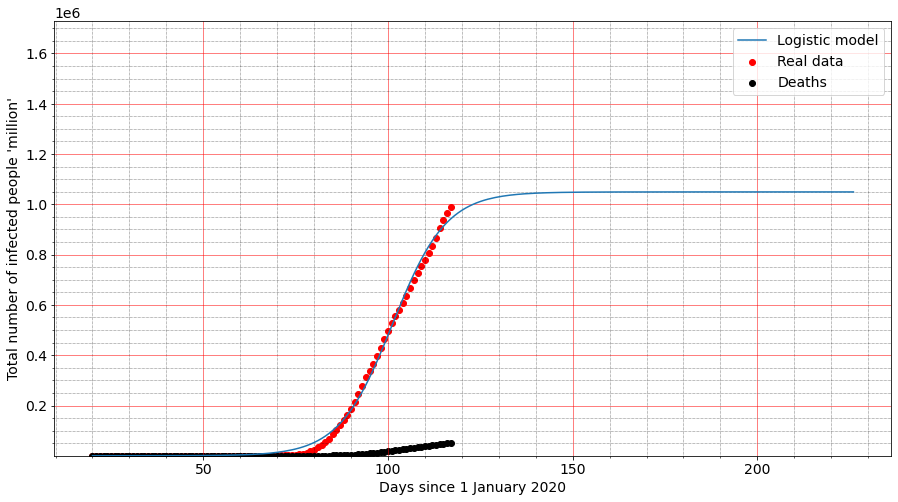

In [12]:
pred_x = list(range(max(x),sol))
plt.rcParams['figure.figsize'] = [15, 8]

plt.rc('font', size=14, )

# Real data
plt.scatter(x,y,label="Real data",color="red")
# Real data
plt.scatter(x,z,label="Deaths",color="black")

# Predicted logistic curve
plt.plot(x+pred_x, [logistic_model(i,fit[0][0],fit[0][1],fit[0][2]) for i in x+pred_x], label="Logistic model")

plt.legend()
plt.xlabel("Days since 1 January 2020")
plt.ylabel("Total number of infected people 'million'")
plt.ylim((min(y)*2.5,c*1.75))

# plt.grid()

# Turn on the minor TICKS, which are required for the minor GRID
plt.minorticks_on()

# Customize the major grid
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
# Customize the minor grid
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')